C:\Users\SATHISH M\AppData\Local\Temp\ipykernel_5732\3446873447.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Closing Price"].fillna(method='ffill', inplace=True)
C:\Users\SATHISH M\AppData\Local\Temp\ipykernel_5732\3446873447.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Closing Price"].fillna(method='ffill', inplace=True)
C:\Users\SATHISH M\AppData\Local\Temp\ipykernel_5732\3446873447.py:11: FutureWarning: A value i

Stock Price Summary:
              mean         std     min     max
Stock                                        
AAPL   310.659233  109.914099  100.10  499.74
AMZN   302.285397  117.103658  100.00  497.93
CVX    290.817699  115.500391  100.29  498.67
GOOGL  294.967973  110.793572  100.13  498.19
GS     301.493315  115.646108  102.35  499.42
JNJ    295.257096  112.081032  100.38  493.86
JPM    294.507041  117.207099  100.30  499.62
KO     306.490027  108.306237  101.51  498.87
MCD    309.775616  113.619055  101.36  499.01
MSFT   296.512658  115.337068  100.63  498.18
PEP    299.878822  116.782342  100.10  499.80
PFE    296.891370  110.499647  101.67  499.10
PG     300.828027  113.333067  100.16  498.41
TSLA   293.336685  117.054303  100.26  499.82
XOM    298.583479  118.417784  101.16  499.29
Stock Volatility:
 Stock
XOM      118.417784
JPM      117.207099
AMZN     117.103658
TSLA     117.054303
PEP      116.782342
GS       115.646108
CVX      115.500391
MSFT     115.337068
MCD      11

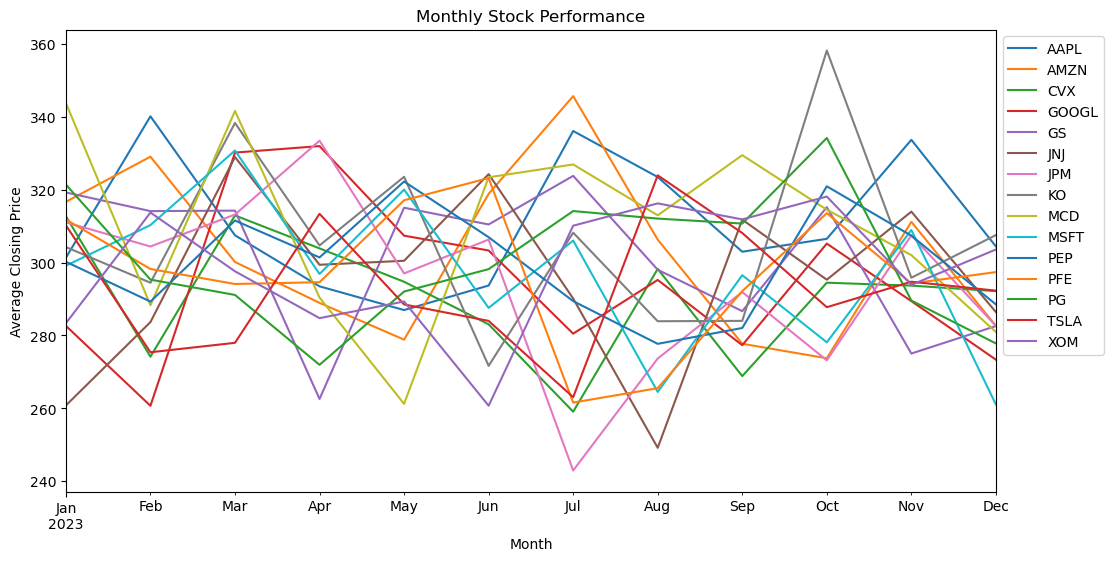

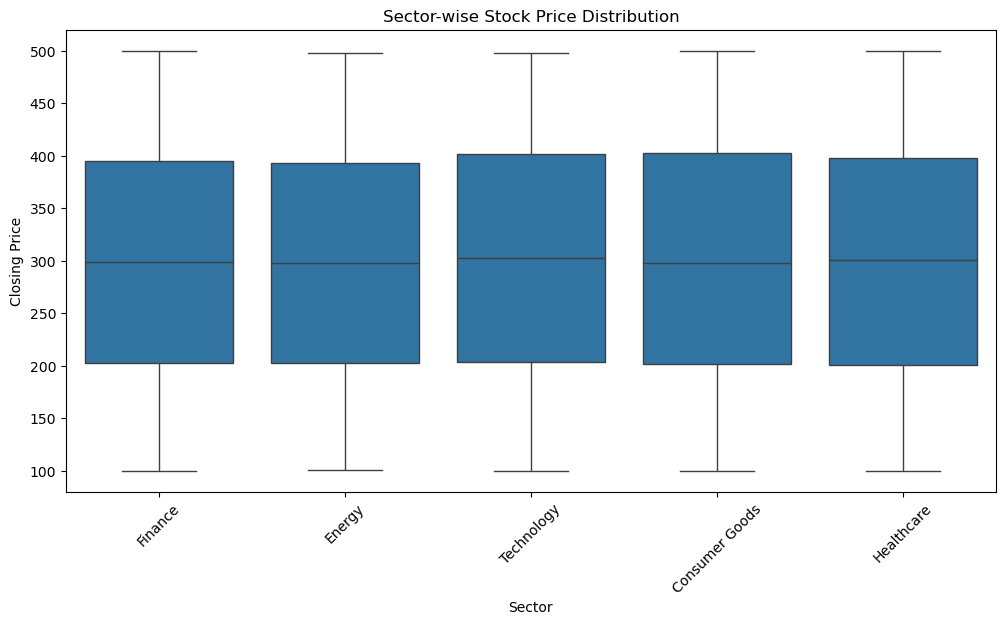

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("stock_market_data.csv", parse_dates=["Date"])

# Handling missing values
df["Closing Price"].fillna(method='ffill', inplace=True)
df["Closing Price"].fillna(method='bfill', inplace=True)
df["Trading Volume"].fillna(method='ffill', inplace=True)
df["Trading Volume"].fillna(method='bfill', inplace=True)

# Add a 'Month' column for time-based analysis
df["Month"] = df["Date"].dt.to_period("M")

# Statistical summary
summary = df.groupby("Stock")["Closing Price"].agg(['mean', 'std', 'min', 'max']).dropna()
print("Stock Price Summary:\n", summary)

# Volatility analysis
volatility = df.groupby("Stock")["Closing Price"].std().dropna()
volatility_sorted = volatility.sort_values(ascending=False)
print("Stock Volatility:\n", volatility_sorted)

# Monthly stock performance
monthly_avg = df.groupby(["Month", "Stock"])["Closing Price"].mean().unstack()
monthly_avg.plot(figsize=(12, 6), title="Monthly Stock Performance")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Sector-wise trend visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sector", y="Closing Price", data=df)
plt.xticks(rotation=45)
plt.title("Sector-wise Stock Price Distribution")
plt.show()
